<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/18.rl_value_iteration_q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

Reinforcement Learning is a branch of machine learning where an agent learns by interacting with the environment on its own based on a simple reward and punishment mechanism.

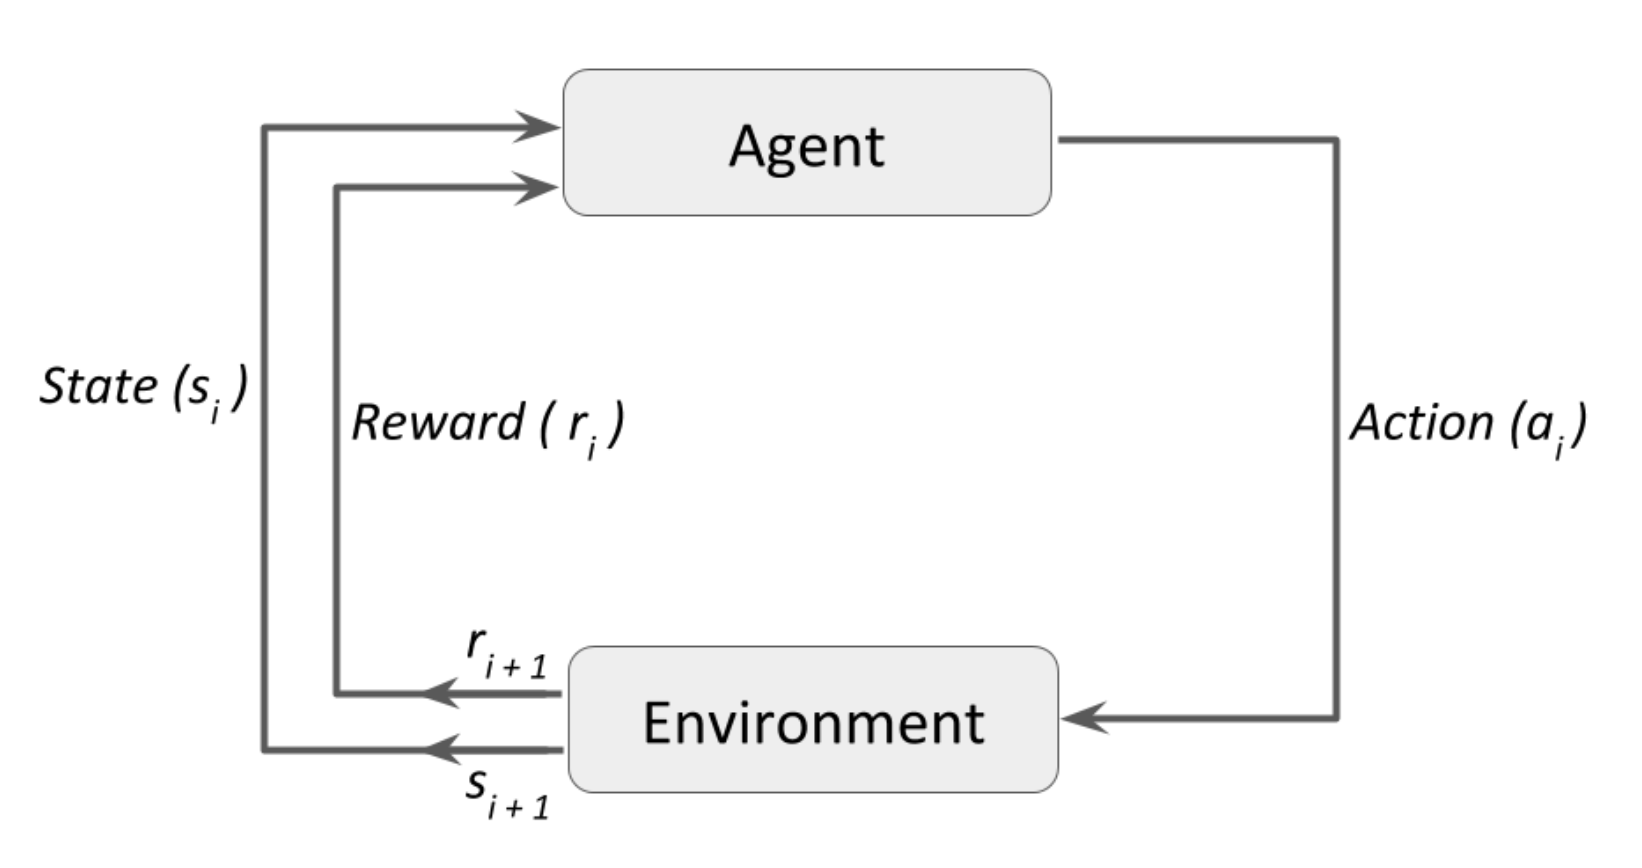

Source: [DataCamp Introduction to Reinforcement Learning](https://www.datacamp.com/community/tutorials/introduction-reinforcement-learning?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1009871&gclid=Cj0KCQjwweyFBhDvARIsAA67M7138AdglBqRPDHT-vrVDYrw5VvfBvzhem7z7uUILE05bpAbRFbZm3AaAvsDEALw_wcB)

### Terminology

- Agent: a hypothetical entity which performs actions in an environment to gain some reward.
- Action (a): All the possible moves that the agent can take.
Environment (e): A scenario the agent has to face.
- State (s): Current situation returned by the environment.
- Reward (R): An immediate return sent back from the environment to evaluate the last action by the agent.
- Policy (π): The strategy that the agent employs to determine next action based on the current state.

    `"A policy is a mapping from states to actions. The goal of reinforcement learning is that the agent learns an optimal policy based on its experiences. A policy is optimal if it maximizes reward in the long run, that is, over many steps. (p. 292, Ertel 2017)"`
- Value (V): The expected long-term return with discount, as opposed to the short-term reward R. Vπ(s), is defined as the expected long-term return of the current state s under policy π.
- Q-value or action-value (Q): Q-value is similar to Value, except that it takes an extra parameter, the current action a. Qπ(s, a) refers to the long-term return of the current state s, taking action a under policy π.


### Learning algorithms

The purpose of a reinforcement learning is to find an optimal policy for the agent. For that purpose, different approaches exist. They are divided into these groups:

1. Value-based vs. Policy-based: In value-based learning, the agent tries different random value functions to find the optimal value function. The optimal policy emerges out of the updated optimal value function. In policy-based learning, a random policy is selected and the value function of that policy is tried to find a new policy.
(Source: [Q Learning: a value-based reinforcement learning algorithm](https://medium.com/intro-to-artificial-intelligence/q-learning-a-value-based-reinforcement-learning-algorithm-272706d835cf)) 

2. Model-based vs. Model-free: In model-based approach, you have access to the complete knowledge of the environment: the state values, the probability distribution of actions and states, etc. So it is possible to construct the optimal policy without exploration. In model-free approach, you do not have access to the knowledge of the environment. Instead, the agent find the optimal policy by trial-and-error.

3. On-Policy vs. Off-Policy: Off-policy means an agent follows a behaviour policy for choosing the action to reach the next state $ s_t+1 $ from state $ s_t $. From $ s_{t+1} $, it uses a policy π that is different from behaviour policy. In Q-learning, we take absolute greedy action as policy π from the next state $ s_t+1 $.
(Source: [Q Learning: a value-based reinforcement learning algorithm](https://medium.com/intro-to-artificial-intelligence/q-learning-a-value-based-reinforcement-learning-algorithm-272706d835cf)) 

We are focusing on two algorithms: value iteration and Q Learning. Q Learning is 'a value-based off-policy temporal difference(TD) reinforcement learning.' It is not following any policy and instead trying to find the optimal policy based on finding the optimal value function. It is also a model-free because knowledge about the model world is incomplete and needs the agent to try out. Value iteration, on the other hand, is a model-based learning because it has the state and action values of the whole world.

## Value Iteration

In reinforcement learning, to find the optimal policy two methods are used: value iteration or policy iteration. Using the value iteration method, the optimal policy is calculated using Bellman's equation:

$$ \pi^*(s) = \underset{a} argmax[r(s, a) + \gamma V^*(\delta(s, a))] $$

- $ \pi^*(s) $: optimal policy
- $ r(s, a) $: immediate reward
- $ \gamma $: discount factor
- $ V^*(\delta(s, a)) $: future reward

The optimal policy results in the maximum value $ V^* $:
$$ \hat V(s) = \underset{a} max[r(s, a) + \gamma V^*(\delta(s, a))] $$

Using the equation, the state value is updated till there is no more update needed. The following code implements the algorithm using the example in p. 297 of Ertel (2017).

In [ ]:
import numpy as np
from enum import Enum

class Move(Enum):
  L = 1
  R = 2
  U = 3
  D = 4
  
  def __str__(self):
    return str(self.name)

class Grid:
  # to force convergence, we consider the values are converged
  # if the updated value is less than the precision value
  PRECISION = 0.001
  MOVES = [Move.L, Move.R, Move.U, Move.D]

  def __init__(self, state, actions, gamma = 0.9, rows=3, columns=3):
    self.state = state
    self.actions = actions
    self.gamma = gamma
    self.rows = rows
    self.columns = columns
  
  def __repr__(self):
    rows = ""
    for row in range(self.rows):
      columns = ""
      for col in range(self.columns):
        columns += " {:03.02f} ".format(self.state[row][col])
      rows += "\n" + columns
      # print(row_values)
    return rows

  def converge(self, limit=100):
    for i in range(limit):
      if self.update_state() == 0:
        print("Converged at ", i)
        return
    
    print("Did not converge after ", limit)

  def update_state(self):
    updated = 0
    # update the state from bottom to top, left to right
    for row in range(self.rows - 1, -1, -1):
      for col in range(0, self.columns, 1):
        value_original = self.state[row][col]
        self.state[row][col] = self.calc_optimal_value((row, col))

        if abs(value_original - self.state[row][col]) > self.PRECISION:
          updated += 1
    print(self)
    return updated
  
  def to_target_pos(self, pos, move):
    cur_row, cur_col = pos
    if Move.L == move:
      return (cur_row, cur_col - 1)
    elif Move.R == move:
      return (cur_row, cur_col + 1)
    elif Move.U == move:
      return (cur_row - 1, cur_col)
    elif Move.D == move:
      return (cur_row + 1, cur_col)
    else:
      raise Exception("Invalid move")

  def is_valid_move(self, pos, move):
    target_row, target_col = self.to_target_pos(pos, move)
    return target_row < self.rows and target_col < self.columns and \
      target_row >= 0 and target_col >= 0

  def get_immediate_reward(self, pos, move):
    return self.actions[pos, move] if (pos, move) in self.actions else 0

  def get_state_value(self, pos):
    return self.state[pos[0]][pos[1]]

  def calc_optimal_value(self, pos):
    """
    pi*(s) = argmax[r(s, a) + \gamma V*(\delta(s, a))]
    """
    possible_values = []
    for move in self.MOVES:
      if self.is_valid_move(pos, move):
        target_pos = self.to_target_pos(pos, move)
        value = self.get_immediate_reward(pos, move) + self.gamma*self.get_state_value(target_pos)
        possible_values.append(value)
    return max(possible_values)

With the class defined, let's now run to see how it converges.

In [ ]:
grid_state = [[0, 0, 0],
              [0, 0, 0],
              [0, 0, 0]]

actions = {}
actions[(2, 0), Move.U] = -1
actions[(2, 0), Move.R] = -1
actions[(2, 1), Move.R] = -1
actions[(2, 1), Move.L] = 1
actions[(2, 2), Move.L] = 1


grid = Grid(grid_state, actions)
# print(grid)
# grid.update_state()
grid.converge()

We can see that it converges after 33 steps. In reality, it keeps improving, but with ever smaller vanishing floating points so it is better to set the minimum threshold where we say that it is good enough. In our case, 

## Q Learning

- Model-free: Q Learning is a model free reinforcement learning algorithm. "Model-free" means that you do not need to have the complete knowledge about the world to learn the algorithm. In constrast, the value iteration method outlined above requies the model of the world.

- Q learning find the optimal policy that the agent learned over time. By "quality", it refers to the quality of the actions from a state.

- The agent learns the optimal policy by maximizing the expected Q value of the total reward for all the states, starting from the current state.

- Q value is calculate using the following formula:


$$ \hat Q(s, a) = r(s, a) + \gamma \space \underset{a'}max \space \hat Q(\delta(s, a), a') $$

In [ ]:
import numpy as np
from enum import Enum

def print_actions(actions):
  for action, reward in actions.items():
    print("{} {} {}".format(action[0], action[1], reward))

class GridQ:
  # to force convergence, we consider the values are converged
  # if the updated value is less than the precision value
  PRECISION = 0.001
  MOVES = [Move.L, Move.R, Move.U, Move.D]

  def __init__(self, state, actions,
               gamma = 0.9, rows=3, columns=3, q_actions=None):
    self.state = state
    self.actions = actions
    self.q_actions = q_actions

    self.gamma = gamma
    self.rows = rows
    self.columns = columns

    self._init_q_actions()
  
  def _init_q_actions(self):
    if not self.q_actions:
      self.q_actions = {}

    for row in range(self.rows):
      for col in range(self.columns):
        for move in self.MOVES:
          pos = row, col
          if self.is_valid_move(pos, move):
            if (pos, move) not in self.q_actions:
              self.q_actions[(row, col), move] = 0

    # print_actions(self.q_actions)

  def __repr__(self):
    rows = ""
    for row in range(self.rows):
      columns = ""
      for col in range(self.columns):
        columns += " {:03.02f} ".format(self.state[row][col])
      rows += "\n" + columns
      # print(row_values)
    return rows

  def converge(self, limit=100):
    for i in range(limit):
      if self.update_state() == 0:
        print("Converged at ", i)
        return
    
    print("Did not converge after ", limit)

  def update_state(self):
    updated = 0
    # update the state from bottom to top, left to right
    for row in range(self.rows - 1, -1, -1):
      for col in range(0, self.columns, 1):
        value_original = self.state[row][col]
        self.state[row][col] = self.get_optimal_value((row, col))

        if abs(value_original - self.state[row][col]) > self.PRECISION:
          updated += 1
    print(self)
    return updated
  
  def to_target_pos(self, pos, move):
    cur_row, cur_col = pos
    if Move.L == move:
      return (cur_row, cur_col - 1)
    elif Move.R == move:
      return (cur_row, cur_col + 1)
    elif Move.U == move:
      return (cur_row - 1, cur_col)
    elif Move.D == move:
      return (cur_row + 1, cur_col)
    else:
      raise Exception("Invalid move")

  def is_valid_move(self, pos, move):
    target_row, target_col = self.to_target_pos(pos, move)
    return target_row < self.rows and target_col < self.columns and \
      target_row >= 0 and target_col >= 0

  def get_action_reward(self, pos, move):
    return self.actions[pos, move] if (pos, move) in self.actions else 0

  def get_state_value(self, pos):
    return self.state[pos[0]][pos[1]]

  def get_optimal_value(self, pos):
    """
    pi*(s) = argmax[r(s, a) + \gamma V*(\delta(s, a))]
    """
    possible_values = []
    for move in self.MOVES:
      if self.is_valid_move(pos, move):
        target_pos = self.to_target_pos(pos, move)
        value = self.get_action_reward(pos, move) \
          + self.gamma*self.get_state_value(target_pos)
        possible_values.append(value)
    return max(possible_values)

  def get_max_q_value(self, pos, move):
    def _max_possible_q_value(pos):
      q_values = []
      for move in self.MOVES:
        if self.is_valid_move(pos, move):
          print(pos, move)
          q_values.append(self.q_actions[pos, move])

      return max(q_values)    

    """
    pi*(s) = argmax[r(s, a) + \gamma V*(\delta(s, a))]
    """
    pos_next = self.to_target_pos(pos, move)
    q_value = self.get_action_reward(pos, move) \
      + self.gamma*_max_possible_q_value(pos_next)
    return q_value

  def calc_q_value(self, pos, move, next_pos, next_move):
    q_value_cur = self.get_action_reward(pos, move)
    q_value_updated = self.get_max_q_value(pos, move, next_pos, next_move)

    print("Q-value: {} Q-value-updated: {}".format(q_value_cur,
                                                   q_value_updated))
    return q_value_updated if q_value_cur != q_value_updated else q_value_cur

  def take_actions(self, actions):
    """
    take the number of actions and calculate Q values
    """
    # print_actions(self.q_actions)
    for id in range(len(actions)):
      pos, move = actions[id]
      q_value = self.get_max_q_value(pos, move)
      print("q_value is {} for {} {}".format(q_value, pos, move))

      self.q_actions[(pos, move)] = q_value
    
    # print_actions(self.q_actions)
  
  def build_actions(self, pos_start, moves):
    actions = []
    pos = pos_start

    for move in moves:
      if self.is_valid_move(pos, move):
        actions.append((pos, move))
        pos = self.to_target_pos(pos, move)

    return actions

### Q Learning in action
The newly defined class GridQ still works for the value iteration. Below is the proof.

In [ ]:
state_q = [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]

actions = {}
actions[(2, 0), Move.R] = -1
actions[(2, 1), Move.R] = -1
actions[(2, 1), Move.L] = 1
actions[(2, 2), Move.L] = 1

grid_q = Grid(state_q, actions)
grid_q

In [ ]:
grid_state = [[0, 0, 0],
              [0, 0, 0],
              [0, 0, 0]]

actions = {}
actions[(2, 0), Move.R] = -1
actions[(2, 1), Move.R] = -1
actions[(2, 1), Move.L] = 1
actions[(2, 2), Move.L] = 1


grid_q = GridQ(grid_state, actions)
# value iteration still works
grid_q.converge()

Using the Q Learning formula, we can now start exploring to get Q values.

In [ ]:
walk1 = grid_q.build_actions((2, 0),
                             [Move.R, Move.R, Move.L, Move.L])
grid_q.take_actions(walk1)
print_actions(grid_q.q_actions)

walk2 = grid_q.build_actions((1, 1),
                             [Move.D, Move.L, Move.U, Move.R])
grid_q.take_actions(walk2)
print_actions(grid_q.q_actions)

walk3 = grid_q.build_actions((1, 0),
                             [Move.D, Move.R, Move.R, Move.U, Move.L, Move.L])
grid_q.take_actions(walk3)
print_actions(grid_q.q_actions)

## Q Learning in Gym

[OpenAI Gym](https://gym.openai.com/) is "a toolkit for developing and comparing reinforcement learning algorithms. It supports teaching agents everything from walking to playing games like Pong or Pinball."

In [ ]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
#Fixing seed for reproducibility
np.random.seed(0)
#Loading and rendering the gym environment
env = gym.make("Taxi-v3").env
env.reset()
env.render()

In [ ]:
#Getting the state space
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

#STEP 1 - Initializing the Q-table

Q = np.zeros((env.observation_space.n, env.action_space.n))

#Setting the hyperparameters
              
alpha = 0.7 #learning rate                 
discount_factor = 0.618               
epsilon = 1                  
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.01         

train_episodes = 2000    
test_episodes = 100          
max_steps = 100 

In [ ]:
#Training the agent

#Creating lists to keep track of reward and epsilon values
training_rewards = []  
epsilons = []

for episode in range(train_episodes):
    #Reseting the environment each time as per requirement
    state = env.reset()    
    #Starting the tracker for the rewards
    total_training_rewards = 0
    
    for step in range(100):
        #Choosing an action given the states based on a random number
        exp_exp_tradeoff = random.uniform(0, 1) 
        
        
        ### STEP 2: SECOND option for choosing the initial action - exploit     
        #If the random number is larger than epsilon: employing exploitation 
        #and selecting best action 
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state,:])      
            
        ### STEP 2: FIRST option for choosing the initial action - explore       
        #Otherwise, employing exploration: choosing a random action 
        else:
            action = env.action_space.sample()
            
            
        ### STEPs 3 & 4: performing the action and getting the reward     
        #Taking the action and getting the reward and outcome state
        new_state, reward, done, info = env.step(action)
        

        ### STEP 5: update the Q-table
        #Updating the Q-table using the Bellman equation
        Q[state, action] = Q[state, action] + alpha * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action]) 
        #Increasing our total reward and updating the state
        total_training_rewards += reward      
        state = new_state         
        
        #Ending the episode
        if done == True:
            #print ("Total reward for episode {}: {}".format(episode, total_training_rewards))
            break
    
    #Cutting down on exploration by reducing the epsilon 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)
    
    #Adding the total reward and reduced epsilon values
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)

print ("Training score over time: " + str(sum(training_rewards)/train_episodes))

In [ ]:
env.render()

In [ ]:
#Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

#Visualizing the epsilons over all episodes
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon for episode")
plt.show()

In [ ]:
import gym
import numpy as np

#create environment
env = gym.make("Taxi-v3")

#initialize Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

gamma = 0.1
alpha = 0.1
epsilon = 0.1
epsilon_decay = 0.99 #decay factor 


total_epochs = 0
episodes = 10000

for episode in range(episodes):
    epochs = 0
    reward = 0
    epsilon = epsilon * epsilon_decay #decay step

    state = env.reset()
    
    while reward != 20:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        next_state, reward, done, info = env.step(action)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * \
                            np.max(Q[next_state]) - Q[state, action])
        state = next_state 
        epochs += 1
    total_epochs += epochs
    
print("Average timesteps taken: {}".format(total_epochs/episodes))